# K Nearest Neighbours

KNN stands for K-Nearest Neighbors and is a machine learning algorithm used for both classification and regression tasks. It is a non-parametric method, which means it does not make any assumptions about the underlying data distribution.

In the KNN algorithm, a prediction is made for a new data point by finding the k nearest data points in the training set, where k is a user-defined hyperparameter. The prediction is based on the majority class (for classification) or the average value (for regression) of the k-nearest neighbors.

The distance between data points is usually calculated using Euclidean distance, but other distance metrics can be used as well. KNN works well when the data has a simple structure and when the number of features is small, but can become computationally expensive as the dataset size and the number of features increases.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
titles = pd.read_csv('../../preprocessing/titles_preprocessed.csv')
credits = pd.read_csv('../../preprocessing/credits_preprocessed.csv')

In [4]:
titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,"['thriller', 'drama', 'crime']",['US'],0.0,tt0037638,7.3,17233.0,7.757
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,"['crime', 'drama']",['US'],0.0,tt0026683,4.0,864.0,3.748
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,"['history', 'drama']",['US'],0.0,tt0006864,7.7,15242.0,9.412


In [36]:
from sklearn.model_selection import train_test_split

In [6]:
# I'm going to use the K Nearest Neighbours method to classify the credits (actors and directors) into different groups:
# 1. High rated
# 2. Medium rated
# 3. Low rated
# based on their TMDB popularity.
# The ratings will be decided based on the average IMDB scores that each actors' movies/shows have.

In [7]:
# Preprocessing the data

# Merge the titles with the actors/directors dataset
merged_titles_credits = pd.merge(credits, titles, on='id', how='left')

# Calculate the average IMDb score and TMDB popularity for each person_id
person_scores_df = merged_titles_credits.groupby('person_id').agg({'imdb_score': 'mean', 'tmdb_popularity': 'mean'}).reset_index()
person_scores_df.rename(columns={'imdb_score': 'average_imdb_score', 'tmdb_popularity': 'average_tmdb_popularity'}, inplace=True)

# Merge the average IMDb scores with the actors/directors dataset
merged_df = pd.merge(credits, person_scores_df, on='person_id', how='left')

# Drop rows with missing average IMDb scores
merged_df.dropna(subset=['average_imdb_score'], inplace=True)

# Drop rows with missing average TMDB popularity
merged_df.dropna(subset=['average_tmdb_popularity'], inplace=True)

# IMDB score bins (0-4 - Low, 4-7 - Medium, 7-10 - High)
bins = [0, 4, 7, 10]
# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Bin the IMDb scores into different ranges and assign labels
merged_df['imdb_score_bin'] = pd.cut(merged_df['average_imdb_score'], bins=bins, labels=labels)

merged_df

,person_id,id,name,character,role,average_imdb_score,average_tmdb_popularity,imdb_score_bin
0,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,6.307692,4.784538,Medium-Rated
1,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,8.200000,8.647000,High-Rated
2,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR,7.400000,5.975500,High-Rated
3,28715,tm19248,Jim Farley,General Thatcher,ACTOR,6.033333,3.394500,Medium-Rated
4,27348,tm19248,Frederick Vroom,A Southern General,ACTOR,8.200000,8.647000,High-Rated
...,...,...,...,...,...,...,...,...
38898,321201,tm1055776,Piotr Trzaskalski,director,DIRECTOR,6.046369,0.898000,Medium-Rated
38899,28071,tm975981,Cher,Herself,ACTOR,7.600000,1.758000,High-Rated
38900,399383,tm975981,Nick Daley,Narrator,ACTOR,7.600000,1.758000,High-Rated
38901,1032862,tm975981,Jonathan Finnigan,director,DIRECTOR,7.600000,1.758000,High-Rated


In [8]:
# Split the dataset into features and target
X = merged_df['average_tmdb_popularity'] # Features: TMDB popularity
Y = merged_df['imdb_score_bin'] # Target: IMDb score bin from merged dataset

# Splitting the data into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

In [17]:
X_train

12662     4.855000
31356     6.336000
37665     0.910000
24266    10.365333
3072      2.462667
           ...    
27264    29.006500
31823     4.209000
20541    16.285000
935       2.200500
34984     1.896000
Name: average_tmdb_popularity, Length: 28879, dtype: float64

In [26]:
# Normalizing TMDB popularity scores
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train.reshape(-1,1))

X_train = scaler.transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1))

array([[9.29331493e-04],
       [1.25279564e-03],
       [6.77068773e-05],
       ...,
       [3.42574958e-03],
       [3.49564055e-04],
       [2.83058429e-04]])

In [27]:
X_test

array([[0.00242402],
       [0.00405994],
       [0.00231547],
       ...,
       [0.00765532],
       [0.000859  ],
       [0.00011062]])

In [28]:
# Checking for outliers
from scipy import stats

z_scores = stats.zscore(merged_df['average_tmdb_popularity'])
outliers = merged_df[abs(z_scores) > 3]

outliers

,person_id,id,name,character,role,average_imdb_score,average_tmdb_popularity,imdb_score_bin
19508,11454,tm18563,Peter Bryant,Black TV Reporter,ACTOR,6.35,496.2475,Medium-Rated
20048,85045,ts15312,Trevor Noah,Self - Host,ACTOR,7.80,380.6175,High-Rated
20049,2002880,ts15312,Michael Kosta,Self - Correspondent,ACTOR,7.60,375.0625,High-Rated
20050,13515,ts15312,Desi Lydic,Self - Correspondent,ACTOR,7.90,392.9535,High-Rated
20823,16935,tm113286,Neal McDonough,Lieutenant Hawk,ACTOR,7.05,454.7095,High-Rated
...,...,...,...,...,...,...,...,...
38373,1729839,tm1151009,Becki Hayes,Monitor,ACTOR,5.80,446.8970,Medium-Rated
38374,2290859,tm1151009,Millie Rose Evans,Nurse,ACTOR,5.80,446.8970,Medium-Rated
38375,657183,tm1151009,Christian Adam,Nerdy Kid,ACTOR,5.80,446.8970,Medium-Rated
38376,2290727,tm1151009,Esmond C. Pickett,Garden Orderly,ACTOR,5.80,446.8970,Medium-Rated


In [29]:
# 230 is not that many instances compared to 38506 in total, so we will leave them.

In [30]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))

In [31]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [32]:
# Predicting results 
Y_pred = knn.predict(X_test)

# Evaluating the KNN model
report(knn, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.91      0.87      0.89      5065
   Low-Rated       0.84      0.84      0.84      1071
Medium-Rated       0.96      0.97      0.97     22743

    accuracy                           0.95     28879
   macro avg       0.90      0.89      0.90     28879
weighted avg       0.95      0.95      0.95     28879



### Classification report - train set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 91% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 96% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 84% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 87% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 97% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 84% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.89
* **Medium-Rated class** - 0.97
* **Low-Rated class** - 0.84

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 5065
* **Medium-Rated class** - 22743
* **Low-Rated class** - 1071


### <u> Accuracy: 95% </u>

In [33]:
report(knn, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.85      0.82      0.83      1764
   Low-Rated       0.73      0.81      0.77       336
Medium-Rated       0.95      0.95      0.95      7527

    accuracy                           0.92      9627
   macro avg       0.84      0.86      0.85      9627
weighted avg       0.92      0.92      0.92      9627



### Classification report - test set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 85% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 95% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 73% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 82% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 95% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 81% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.83
* **Medium-Rated class** - 0.95
* **Low-Rated class** - 0.77

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 1764
* **Medium-Rated class** - 7527
* **Low-Rated class** - 336


### <u> Accuracy: 92% </u>

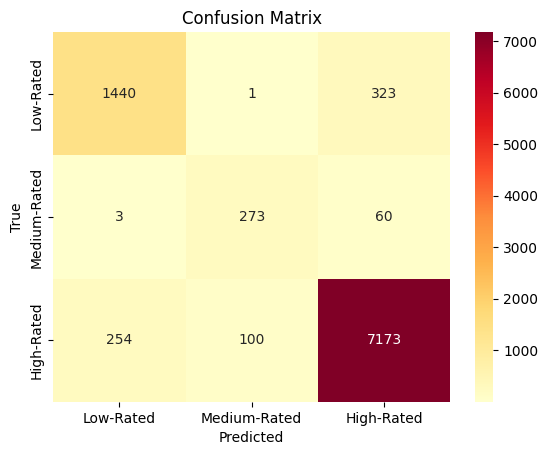

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [38]:
cm

array([[1440,    1,  323],
       [   3,  273,   60],
       [ 254,  100, 7173]], dtype=int64)

### Confusion matrix

##### For the Low-Rated class:
* 1440 samples were correctly predicted as Low-Rated
* 1 sample was predicted as Medium-Rated but was actually Low-Rated
* 323 samples were predicted as High-Rated but were actually Low-Rated

##### For the Medium-Rated class:
* 3 samples were predicted as Low-Rated but were actually Medium-Rated
* 273 samples were correctly predicted as Medium-Rated 
* 60 samples were predicted as High-Rated but were actually Medium-Rated 

##### For the High-Rated class:
* 254 samples were predicted as Low-Rated but were actually High-Rated
* 100 samples were predicted as Medium-Rated but were actually High-Rated
* 7173 samples were correctly predicted as High-Rated


In [ ]:
# Exporting the data to other files (GridCV, Ensembles...)
import pickle

with open('data.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, Y_train, Y_test), f)